In [1]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

Using TensorFlow backend.


In [10]:
batch_size = 128
num_classes = 10
epochs = 24

In [3]:
# input image dimensions
img_rows, img_cols = 28, 28

In [4]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [6]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [7]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [8]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [9]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [11]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [12]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/24
60000/60000 [==============================] - 1416s 24ms/step - loss: 0.2824 - acc: 0.9131 - val_loss: 0.0643 - val_acc: 0.9791
Epoch 2/24
60000/60000 [==============================] - 1638s 27ms/step - loss: 0.0969 - acc: 0.9711 - val_loss: 0.0437 - val_acc: 0.9850
Epoch 3/24
60000/60000 [==============================] - 1622s 27ms/step - loss: 0.0754 - acc: 0.9769 - val_loss: 0.0404 - val_acc: 0.9875
Epoch 4/24
60000/60000 [==============================] - 1423s 24ms/step - loss: 0.0621 - acc: 0.9815 - val_loss: 0.0384 - val_acc: 0.9880
Epoch 5/24
60000/60000 [==============================] - 1578s 26ms/step - loss: 0.0549 - acc: 0.9835 - val_loss: 0.0356 - val_acc: 0.9895
Epoch 6/24
60000/60000 [==============================] - 1509s 25ms/step - loss: 0.0502 - acc: 0.9848 - val_loss: 0.0395 - val_acc: 0.9872
Epoch 7/24
60000/60000 [==============================] - 1319s 22ms/step - loss: 0.0466 - acc: 0.9858 - val_l

In [13]:
score = model.evaluate(x_test, y_test, verbose=0)

In [14]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.0459411512044
Test accuracy: 0.9903


In [15]:
import shap
import numpy as np

In [16]:
# select a set of background examples to take an expectation over
background = x_train[np.random.choice(x_train.shape[0], 100, replace=False)]

In [30]:
# explain predictions of the model on three images
e = shap.DeepExplainer(model, background)
# ...or pass tensors directly
# e = shap.DeepExplainer((model.layers[0].input, model.layers[-1].output), background)
shap_values = e.shap_values(x_test[1:9])

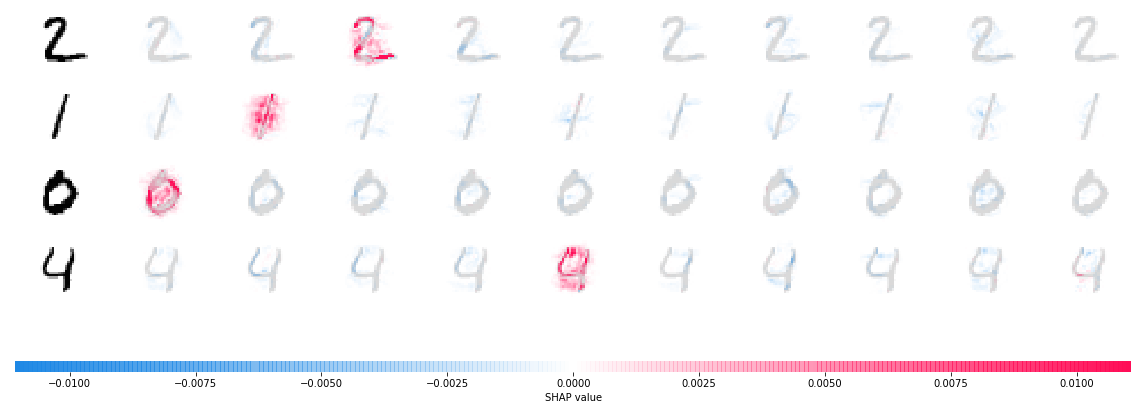

In [29]:
# plot the feature attributions
shap.image_plot(shap_values, -x_test[1:5],show=True)

The plot above shows the explanations for each class on four predictions. Note that the explanations are ordered for the classes 0-9 going left to right along the rows.